In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

(array([  5664.,   5011.,   5765.,   5577.,   6457.,  11937.,   6054.,
          5455.,   5934.,  10287.]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ]),
 <a list of 10 Patch objects>)

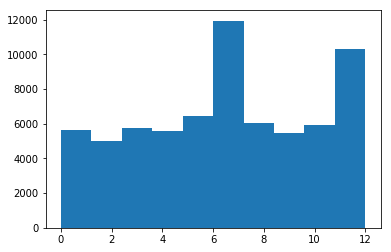

In [238]:
df = pd.read_csv('/Users/toni/Desktop/metis/terror2.csv')

#total count of terrorist events per year globally
global_annual = df.groupby('iyear').size()
plt.hist(df.imonth)

(array([  1790.,   3776.,   7831.,   8776.,  10560.,   4535.,   2672.,
          3447.,   5816.,  18938.]),
 array([ 1971. ,  1975.4,  1979.8,  1984.2,  1988.6,  1993. ,  1997.4,
         2001.8,  2006.2,  2010.6,  2015. ]),
 <a list of 10 Patch objects>)

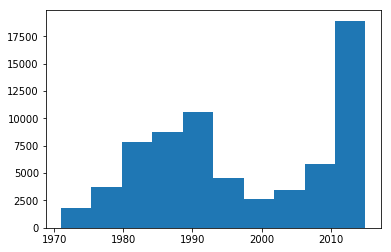

In [239]:
plt.hist(df.iyear)

In [240]:
#countrycodes
countrycodes = pd.read_csv("/Users/toni/Desktop/metis/mcnulty/D3/countrycodes.csv")
countrycodes.columns = ('code', 'country')
countrycodes['country'] = countrycodes.country.map(lambda x: x.lower())
countrycodes['country'] = countrycodes.country.map(lambda x: x.strip())
countryindex = countrycodes.set_index('country')

#total count of terrorists per year per country
countrycounts = df[['perpo_txt_new','current_year_count','iyear']]

In [246]:
def match (x):
    try:
        return countryindex.get_value(x, 'code')
    except:
        return np.nan

In [254]:
countrycounts['id']=countrycounts.perpo_txt_new.map(lambda x: match(x))
countrycounts[countrycounts.id.isnull()].perpo_txt_new.value_counts()

gaza strip              1305
united states           1069
syria                    475
['great britain']        417
russia                   411
iran                     184
west germany (frg)       182
bolivia                   61
macedonia                 42
venezuela                 42
['northern ireland']      21
tanzania                   8
south korea                5
moldova                    3
czech republic             3
['puerto rico']            3
soviet union               3
laos                       1
['vietnam']                1
north korea                1
['albania']                1
international              1
taiwan                     1
Name: perpo_txt_new, dtype: int64

In [255]:
def add_missing(row):
    if row.perpo_txt_new == 'gaza strip':
        return 376
    elif row.perpo_txt_new == 'united states':
        return 840
    elif row.perpo_txt_new == 'syria':
        return 760
    elif row.perpo_txt_new == "['great britain']":
        return 826
    elif row.perpo_txt_new == 'russia':
        return 643
    elif row.perpo_txt_new == 'iran':
        return 364
    elif row.perpo_txt_new == 'west germany (frg)':
        return 276
    elif row.perpo_txt_new == 'bolivia':
        return 68
    elif row.perpo_txt_new == 'south korea':
        return 410
    elif row.perpo_txt_new == 'moldova':
        return 498
    elif row.perpo_txt_new == 'czech republic':
        return 200
    elif row.perpo_txt_new == 'tanzania':
        return 834
    elif row.perpo_txt_new == 'venezuela':
        return 862
    elif row.perpo_txt_new == 'macedonia':
        return 807
    elif row.perpo_txt_new == "['northern ireland']":
        return 372
    elif row.perpo_txt_new == 'czech republic':
        return 203
    elif row.perpo_txt_new == "['puerto rico']":
        return 840
    elif row.perpo_txt_new == 'soviet union':
        return 643
    elif row.perpo_txt_new == "['vietnam']":
        return 714
    elif row.perpo_txt_new == 'north korea':
        return 408
    elif row.perpo_txt_new == "['albania']":
        return 8
    elif row.perpo_txt_new == 'taiwan':
        return 158
    else:
        return row.id

In [264]:
countrycounts ['id2'] = countrycounts.apply(lambda x: add_missing(x), axis = 1)
countrycounts[countrycounts.id2.isnull()]

,perpo_txt_new,current_year_count,iyear,id,id2
40464,international,1,2002,NaN,NaN
41185,laos,1,2003,NaN,NaN


In [ ]:
#percentage terror/year
countrycounts['rate'] = countrycounts.apply(lambda row: row.current_year_count/global_annual[row.iyear], axis = 1)
# countrycounts[countrycounts.iyear == 2015][['id2','rate','current_year_count','ratem']].to_csv('/Users/toni/Desktop/metis/mcnulty/d33/2015rates.csv', sep='\t')

In [202]:
def norm (x):
    if x <  .05:
        return .05
    else:
        return x

(array([ 43808.,  12397.,   6502.,   4253.,    704.,    107.,    140.,
             0.,      0.,    230.]),
 array([ 0.05      ,  0.11576923,  0.18153846,  0.24730769,  0.31307692,
         0.37884615,  0.44461538,  0.51038462,  0.57615385,  0.64192308,
         0.70769231]),
 <a list of 10 Patch objects>)

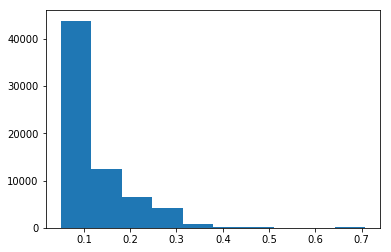

In [204]:
cmod = countrycounts
cmod['ratem'] = cmod.rate.map(norm)

plt.hist(countrycounts.ratem)

(array([  770.,   997.,  1333.,   918.,   555.,     0.,     0.,     0.,
            0.,  1311.]),
 array([  1.69952413e-04,   2.24337186e-02,   4.46974847e-02,
          6.69612508e-02,   8.92250170e-02,   1.11488783e-01,
          1.33752549e-01,   1.56016315e-01,   1.78280082e-01,
          2.00543848e-01,   2.22807614e-01]),
 <a list of 10 Patch objects>)

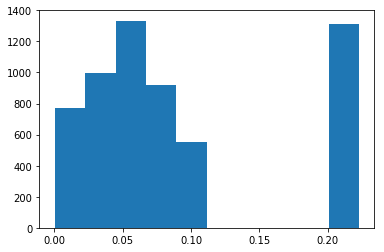

In [178]:
plt.hist(countrycounts[countrycounts.iyear == 2015].rate)

(array([  770.,   997.,  1333.,   918.,   555.,     0.,     0.,     0.,
            0.,  1311.]),
 array([  1.00000000e+00,   1.32000000e+02,   2.63000000e+02,
          3.94000000e+02,   5.25000000e+02,   6.56000000e+02,
          7.87000000e+02,   9.18000000e+02,   1.04900000e+03,
          1.18000000e+03,   1.31100000e+03]),
 <a list of 10 Patch objects>)

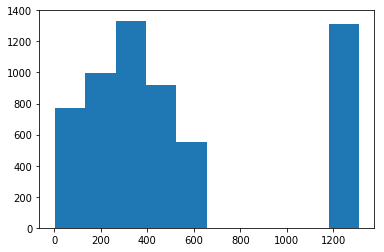

In [179]:
plt.hist(countrycounts[countrycounts.iyear == 2015].current_year_count)

(array([ 3100.,   404.,  1069.,     0.,     0.,     0.,     0.,     0.,
            0.,  1311.]),
 array([ 0.05      ,  0.06728076,  0.08456152,  0.10184228,  0.11912305,
         0.13640381,  0.15368457,  0.17096533,  0.18824609,  0.20552685,
         0.22280761]),
 <a list of 10 Patch objects>)

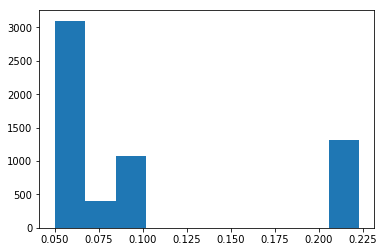

In [195]:
plt.hist(countrycounts[countrycounts.iyear == 2015].ratem)

In [291]:
newcodes = pd.read_csv('/Users/toni/Desktop/metis/mcnulty/d33/d3/codes.csv')
newcodes.columns = ('country','a2','a3','num','other')

final = countrycounts[['perpo_txt_new', 'current_year_count', 'iyear', 'id2', 'rate']].merge(newcodes[['a3','num']], left_on = 'id2', right_on = 'num', how = 'left')
final

,country,count,year,idn,rate,idt,num
0,turkey,26,1971,792.0,0.098859,TUR,792.0
1,uruguay,8,1971,858.0,0.030418,URY,858.0
2,united states,107,1971,840.0,0.406844,USA,840.0
3,uruguay,8,1971,858.0,0.030418,URY,858.0
4,turkey,26,1971,792.0,0.098859,TUR,792.0
5,united states,107,1971,840.0,0.406844,USA,840.0
6,turkey,26,1971,792.0,0.098859,TUR,792.0
7,ethiopia,1,1971,231.0,0.003802,ETH,231.0
8,argentina,7,1971,32.0,0.026616,ARG,32.0
9,united states,107,1971,840.0,0.406844,USA,840.0


In [326]:
final.columns = ('country', 'count', 'year', 'idn', 'rate', 'idt','num')
finaljson = final[['year','idt','count']].fillna(0)

prep = finaljson.pivot_table(index= 'idt', columns= 'year', aggfunc=np.sum)

final.max()

count    1311.000000
year     2015.000000
idn       894.000000
rate        0.707692
num       894.000000
dtype: float64

In [333]:
final[final.idn == 840]

,country,count,year,idn,rate,idt,num
2,united states,107,1971,840.0,0.406844,USA,840.0
5,united states,107,1971,840.0,0.406844,USA,840.0
9,united states,107,1971,840.0,0.406844,USA,840.0
19,united states,107,1971,840.0,0.406844,USA,840.0
24,united states,107,1971,840.0,0.406844,USA,840.0
33,united states,107,1971,840.0,0.406844,USA,840.0
34,united states,107,1971,840.0,0.406844,USA,840.0
35,united states,107,1971,840.0,0.406844,USA,840.0
36,united states,107,1971,840.0,0.406844,USA,840.0
37,united states,107,1971,840.0,0.406844,USA,840.0


In [304]:
prep.to_json('/Users/toni/Desktop/metis/mcnulty/d33/d3/data.json')